# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as d

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [5]:
df.drop(columns='Id', inplace=True)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [6]:
# creating new Series of Null values normalized for each column 
percent_missing = df.isnull().sum() * 100/len(df)

In [7]:
percent_missing.head()

MSSubClass      0.000000
MSZoning        0.000000
LotFrontage    17.739726
LotArea         0.000000
Street          0.000000
dtype: float64

In [8]:
#creating new subset with percentage of missing value per column
missing_value = pd.DataFrame({'column_name':df.columns,
                             'percent_missing':percent_missing})

missing_value.sort_values(by='percent_missing', ascending=False, inplace=True)

missing_value[missing_value['percent_missing'] > 20]

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274


In [9]:
more_than_20_empty = missing_value[missing_value['percent_missing'] > 20]

more_than_20_empty.columns

Index(['column_name', 'percent_missing'], dtype='object')

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [10]:
df.drop(columns=more_than_20_empty['column_name'], inplace=True)

df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

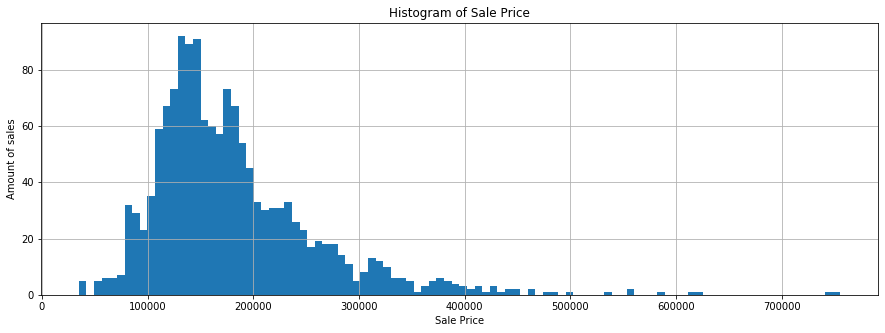

In [11]:
df['SalePrice'].hist(bins=100, figsize=(15,5))
plt.title('Histogram of Sale Price', fontweight=500)
plt.xlabel('Sale Price')
plt.ylabel('Amount of sales')
plt.show()

In [ ]:
# plotting KDE of Sale Price

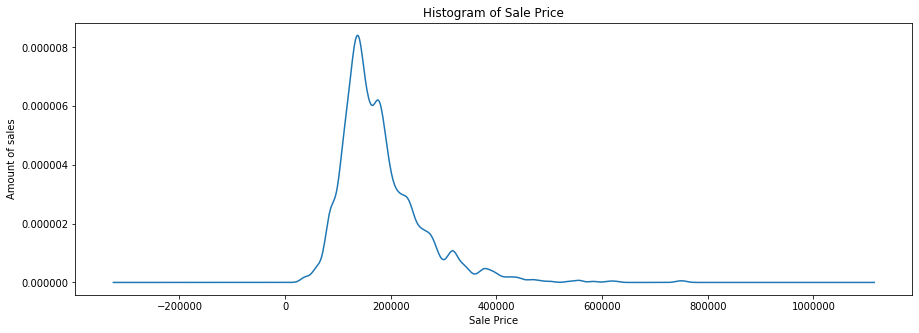

In [55]:
df['SalePrice'].plot.akde(bw_method=0.1,figsize=(15,5))
plt.title('Histogram of Sale Price', fontweight=500)
plt.xlabel('Sale Price')
plt.ylabel('Amount of sales')
plt.show()

In [12]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
"""
The SalePrice column is not Normally distributed and is right-skewed ;
Most of House sales account for prices in between approximatively 130K & 170K, 
but some very expensive hours skew the distribution 
"""

'\nThe SalePrice column is not Normally distributed and is right-skewed ;\nMost of House sales account for prices in between approximatively 130K & 170K, \nbut some very expensive hours skew the distribution \n'

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the right. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [14]:
df['SalePrice'].skew()

1.8828757597682129

In [15]:
# Method 1 - Log Transform
sales_loged = np.log(df['SalePrice'])
sales_loged.skew()

0.12133506220520406

In [16]:
# This Log Transform Method drops down the overall skewness of the Series from 1.8 to 0.12, Not bad !
# Let's plot it

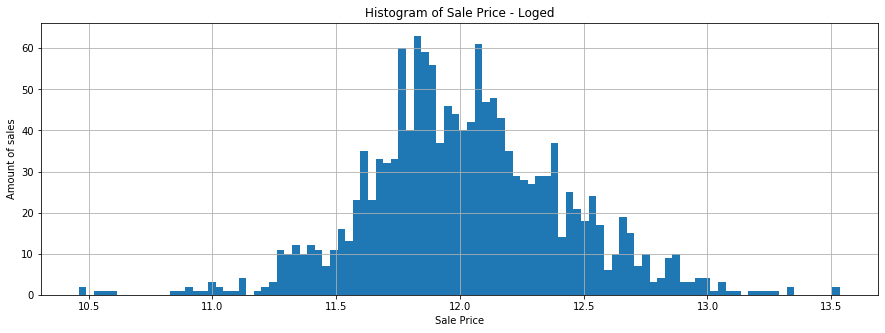

In [17]:
np.log(df['SalePrice']).hist(bins=100, figsize=(15,5))
plt.title('Histogram of Sale Price - Loged', fontweight=500)
plt.xlabel('Sale Price')
plt.ylabel('Amount of sales')
plt.show()

In [18]:
# Method 2 - Box-Cox Transform
sales_boxcox = stats.boxcox(df['SalePrice'])[0] #stats.boxcox outputs a tuple of data ;
#[0]th index encompasses the normalizeddata

pd.Series(sales_boxcox).skew()

-0.008652893640830044

In [78]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
# This BoxCox Transform Method drops down the overall skewness of the Series from 1.8 to -0.008, Perfection !

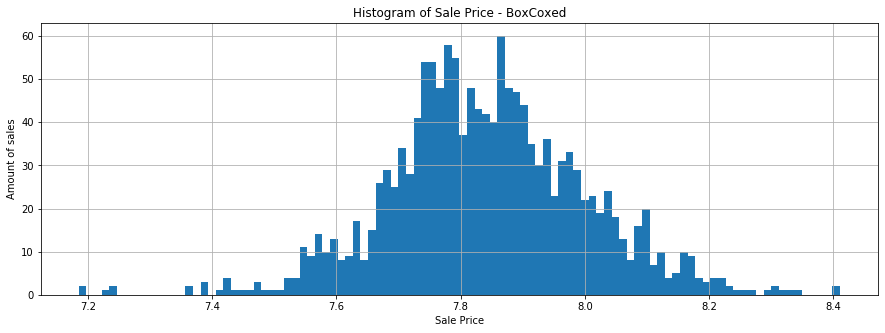

In [20]:
pd.Series(stats.boxcox(df['SalePrice'])[0]).hist(bins=100, figsize=(15,5))
plt.title('Histogram of Sale Price - BoxCoxed', fontweight=500)
plt.xlabel('Sale Price')
plt.ylabel('Amount of sales')
plt.show()

In [21]:
# Method 3 - Square Root Transform
sales_sqrted = np.sqrt(df['SalePrice'])

sales_sqrted.skew()

0.9431527373310963

In [22]:
# This Square Root Transform Method is not very effective - only negligible 

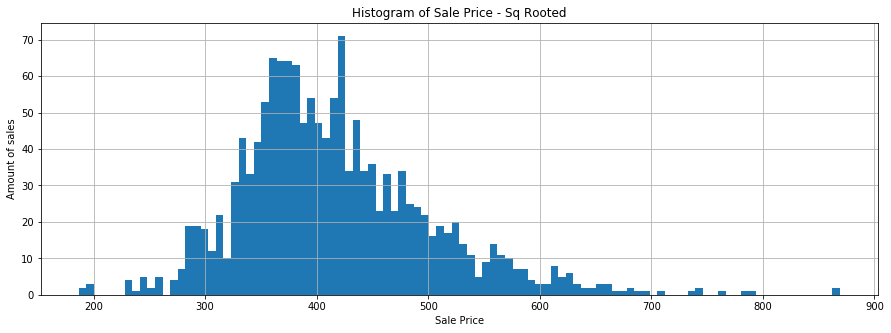

In [23]:
np.sqrt(df['SalePrice']).hist(bins=100, figsize=(15,5))
plt.title('Histogram of Sale Price - Sq Rooted', fontweight=500)
plt.xlabel('Sale Price')
plt.ylabel('Amount of sales')
plt.show()

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [24]:
#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.width', 1000)

##### Your Code

**Data Wrangling**

In [25]:
# Simplifying amount of features

In [26]:
# Creating new columns : 
#  - Bath_amount = sum of all FullBath, HalfBath, BsmtFullBath, BsmtHalfBath
bathrooms_list = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

df['Bath_amount'] = df.loc[:,bathrooms_list].sum(axis=1)

In [27]:
#  - Total_Room = 'TotRmsAbvGrd', 'FullBath', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr'
rooms = ['FullBath', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr']

df['Total_Room'] = df.loc[:,rooms].sum(axis=1)

In [28]:
# Total_Area = sum GrLivArea + LotArea + GarageArea
area_list = ["GrLivArea", "LotArea", "GarageArea"]

df['Total_Area'] = df.loc[:,area_list].sum(axis=1)

In [29]:
# Creating Age colums for overall House Age & Age since last House Remodeling

In [30]:
# access current year
current_year = int(d.datetime.now().year)

current_year

df['YearBuilt'] = df['YearBuilt'].astype(int)
                                 
df['YearRemodAdd'] = df['YearRemodAdd'].astype(int)

df['House_age'] = current_year - df['YearBuilt']

df['Remodel_age'] = current_year - df['YearRemodAdd']

**Testing out general pairplot**

In [31]:
# Too many variables may create an unreadable pairplot but may generates some plotting ideas

In [32]:
pairplot_list = ['GrLivArea', 'LotArea', 'GarageArea', 'Neighborhood', 'House_age', 'Remodel_age', 
                 'BedroomAbvGr', 'KitchenAbvGr','Bath_amount','PoolArea','OverallQual', 'RoofStyle', 'Heating']

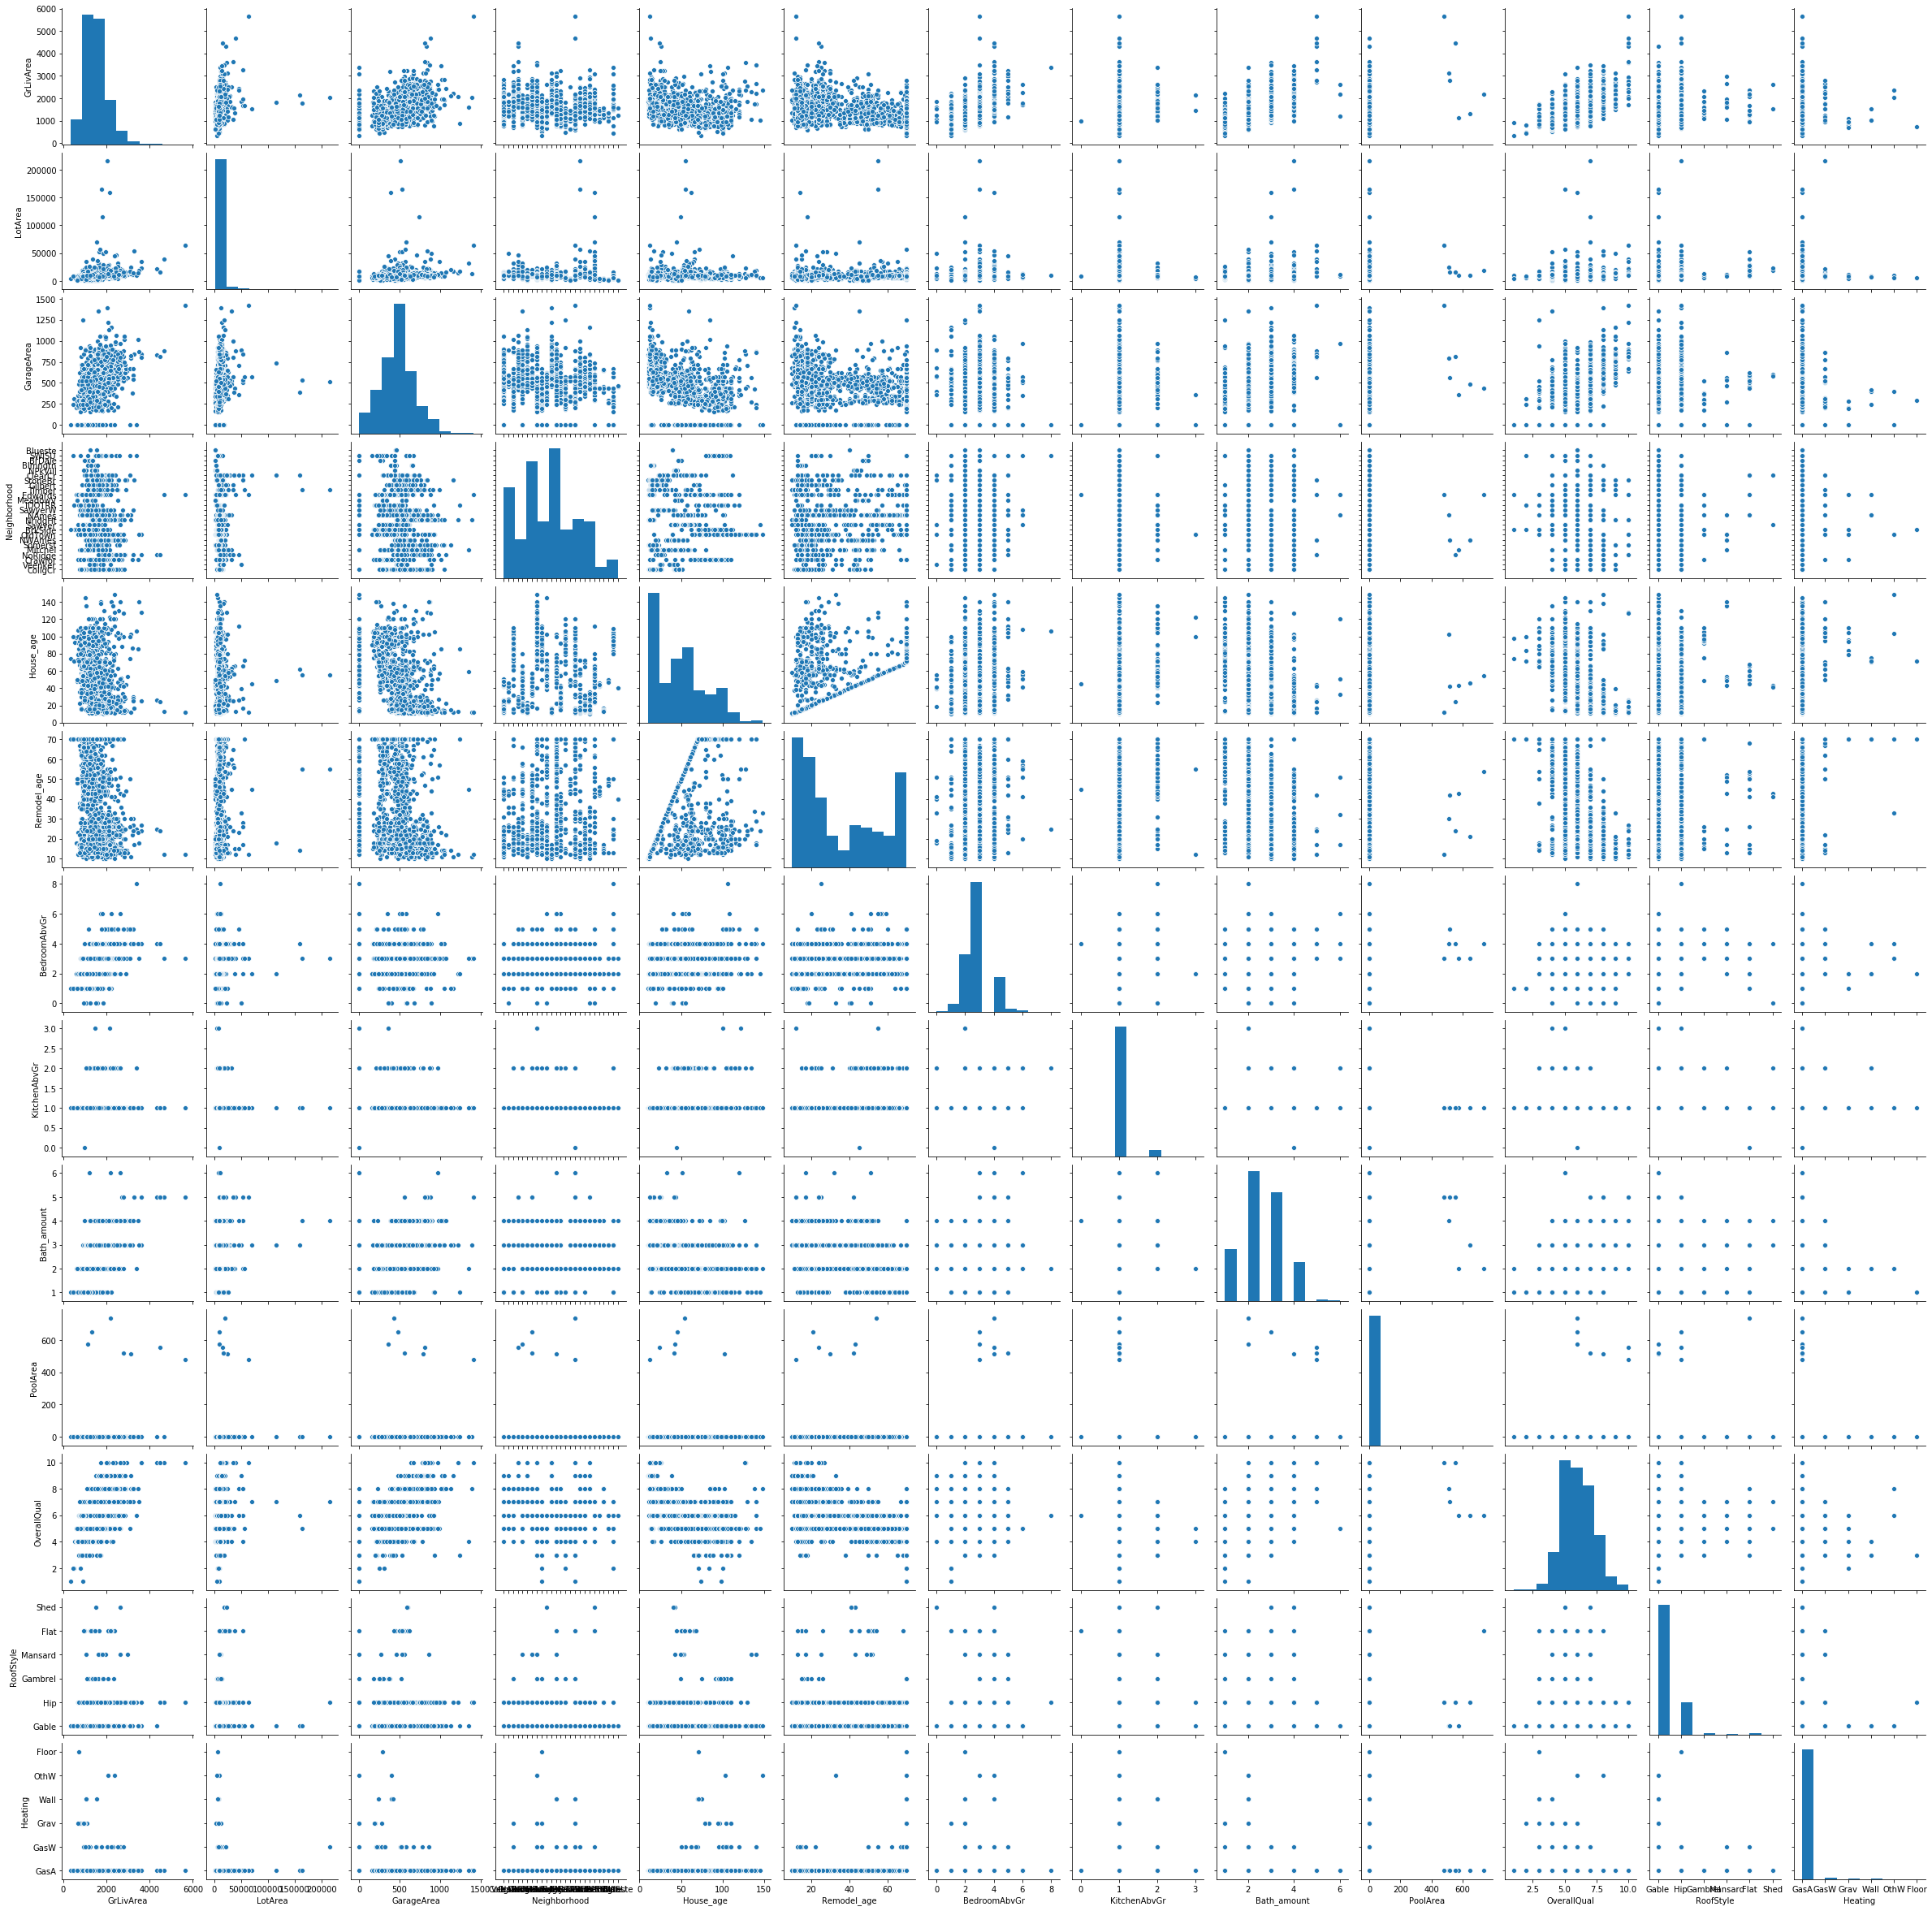

In [33]:
sns.pairplot(data=df, vars=pairplot_list)

**Neighbourhood influence**

In [34]:
# general boxplot to measure which neighbourhoods are the moxt expensive

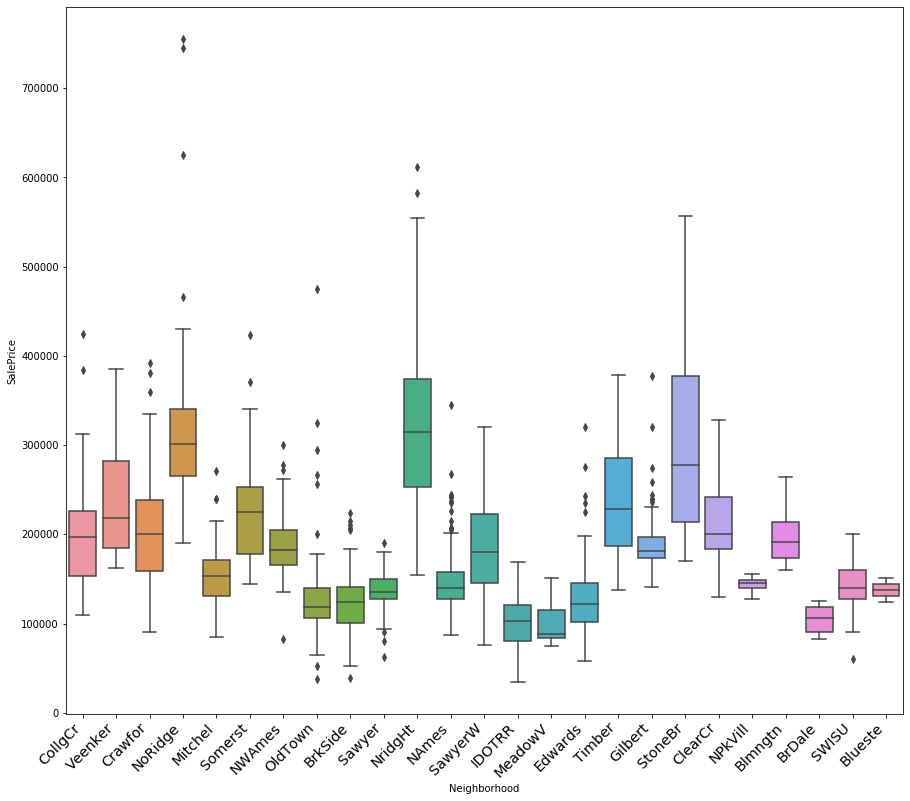

In [35]:
plt.figure(figsize=(15,13))

ax = sns.boxplot(x='Neighborhood',y='SalePrice',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

**Size area**

In [36]:
# Checking Neighborhood location influence

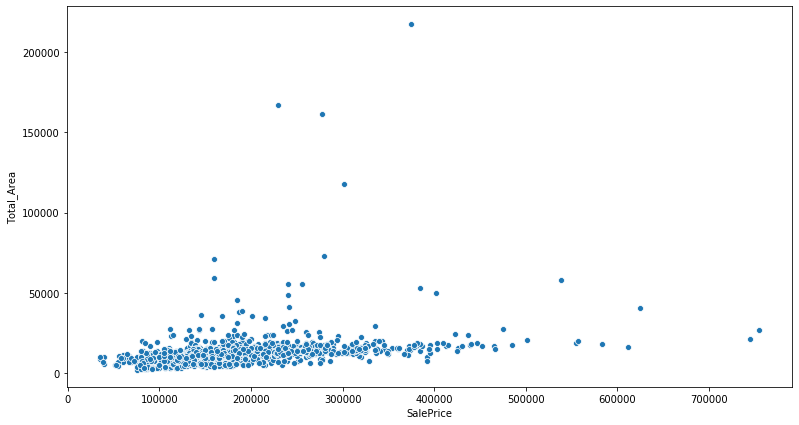

In [37]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='SalePrice',y='Total_Area',data=df)

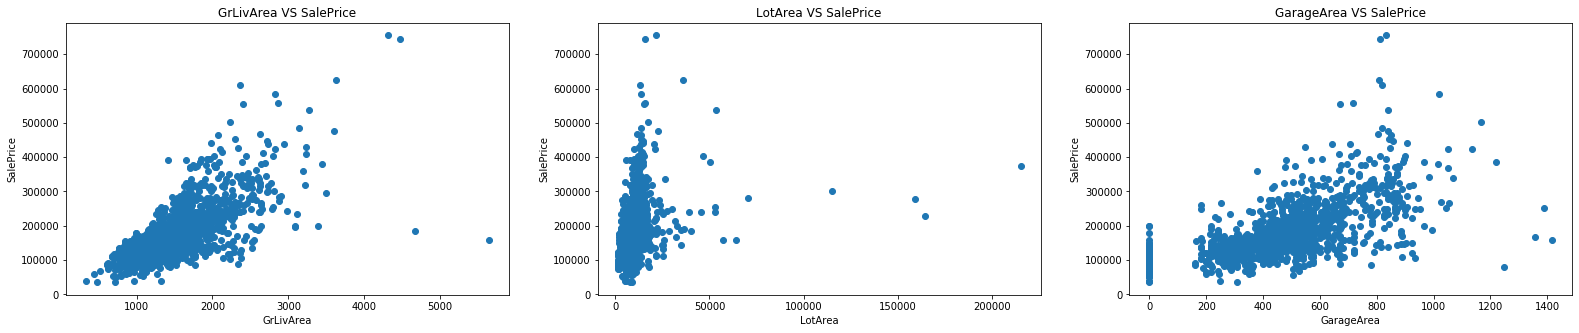

In [38]:
house_area = ['GrLivArea', 'LotArea', 'GarageArea']

fig, ax = plt.subplots(1, len(house_area), figsize=(27,5))

for index in range(len(house_area)):
    ax[index].scatter(df[house_area[index]], df['SalePrice'])
    ax[index].set_title(f"{house_area[index]} VS SalePrice", fontweight=500)
    ax[index].set_xlabel(f"{house_area[index]}")
    ax[index].set_ylabel("SalePrice")

**Number of rooms**

Text(0.5, 1.0, 'Sale price VS. number of rooms')

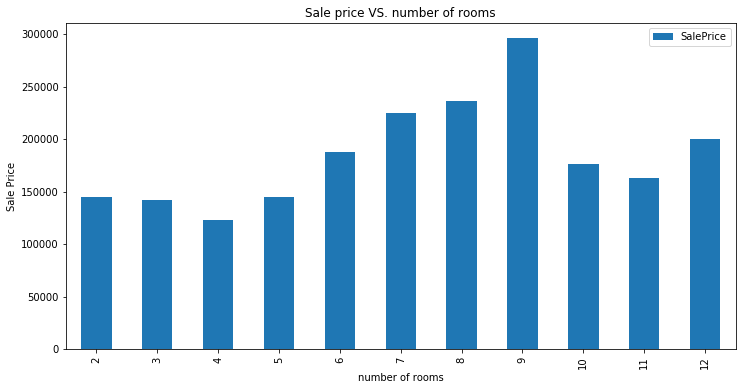

In [39]:
# df['Total_Area'], df['SalePrice']
df.groupby('Total_Room').agg({'SalePrice':'mean'}).plot(kind='bar', figsize=(12,6))
plt.xlabel('number of rooms')
plt.ylabel('Sale Price')
plt.title('Sale price VS. number of rooms')

In [40]:
# Number of bathrooms

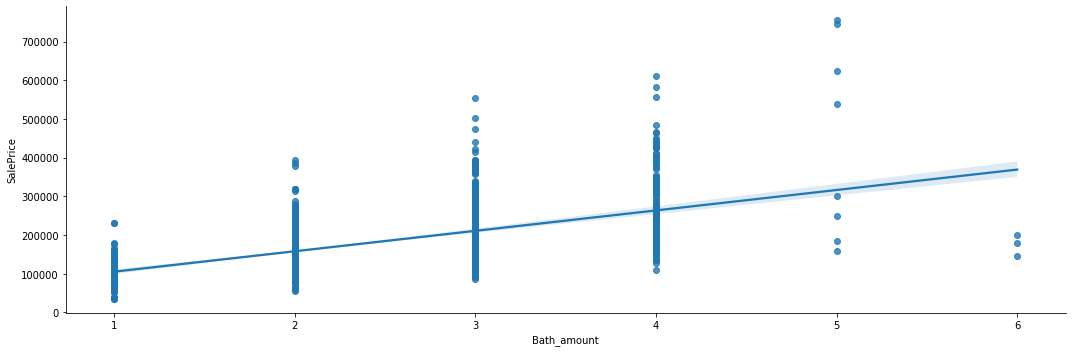

In [41]:
sns.lmplot(x='Bath_amount',y='SalePrice',data=df,
          height=5, aspect=3)

In [42]:
# How long the house has been built or remodeled (YearBuilt and YearRemodAdd).

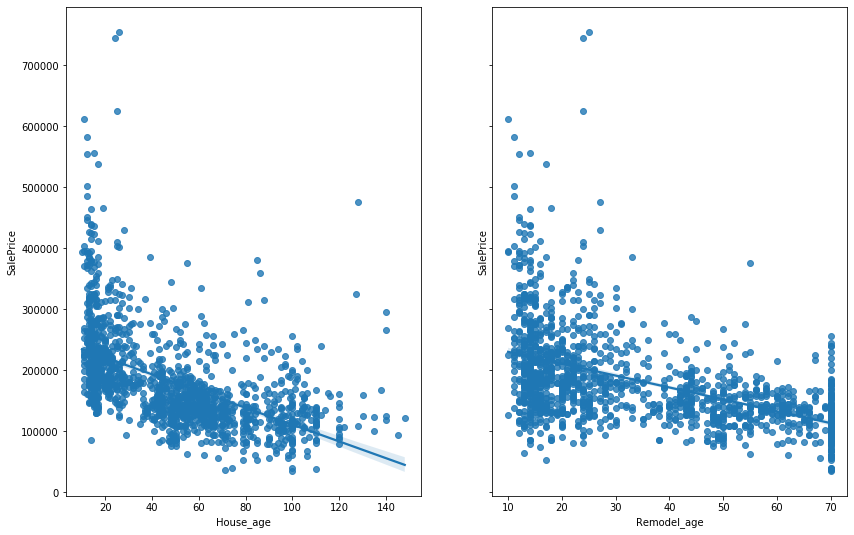

In [43]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(14,9))
sns.regplot(x='House_age', y='SalePrice', data=df, ax = ax1)
sns.regplot(x='Remodel_age', y='SalePrice', data=df, ax = ax2)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

In [44]:
# Generating corr matrix
df_corr = df.corr()

# Generating mask to only display one half of the symetric correlation matrix
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

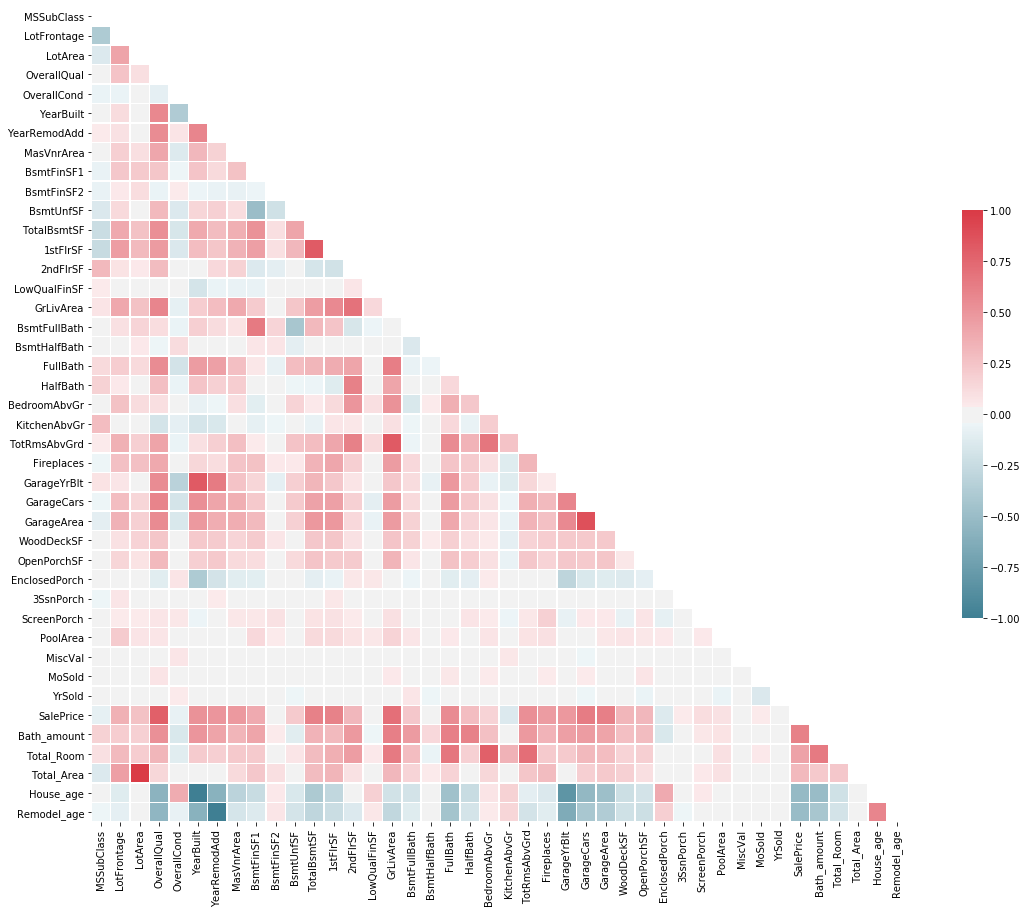

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, mask=mask, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

##### your comment here
SalePrice highly correlated with : Overall Qual, GrLivArea, Garage Cars.
As well as strongly negatively correlated with House Age & Remodel Age

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [46]:
# your responses here

In [47]:
#checking correlation scores
df_corr['OverallQual']['SalePrice']

0.7909816005838047

In [48]:
df_corr['Total_Room']['SalePrice']

0.4298880222953098

**Quality always primes**

Overall Qual is a key factor for the overall Sale Price - when mapping House Prices, you always want to closely check on the Overall Qual.
It will be of utmost importance for the constant increase of the overall price (correlation score of 0.79 = very strong correlation)

**Area of the House influences greatly the overall price**

GrLivArea, Total_Area and Area related metrics influence positively the price.
Frong previous plots, Number of Rooms are a strong indicators of the price increase as well

**The higher the amount of features, the more expensive it gets**
Various "extra-features", notably : Garage Cars & Number of Bathrooms influence the price.
Houses with 4 bathroom assess for the most expensive ones.

**Looking for young assets**
The younger the house, both in terms of Building Year & Last Renovation, 
The older the estate, the cheaper it becomes.